# 0.0 IMPORTS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 0.1 HELPER FUNCTIONS

In [2]:
def check_uniqueness(series):
    
    indexes_array = []    
    for element in series:
        try:
            if (series.value_counts()[element] != 1):
                indexes = series[series == element].index.to_numpy()
                #np.concatenate((indexes_array, indexes))                
                indexes_array.append(indexes)

        except KeyError:
            continue           

    indexes_array = np.concatenate(indexes_array)
    indexes_array = np.unique(indexes_array)
    return indexes_array

def show_descriptive_statistics(df):
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(df.apply(np.mean))
    ct2 = pd.DataFrame(df.apply(np.median))    
    ct3 = pd.DataFrame(df.apply(lambda x: x.mode()))

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(df.apply(np.std))
    d2 = pd.DataFrame(df.apply(min))
    d3 = pd.DataFrame(df.apply(max))
    d4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    d5 = pd.DataFrame(df.apply(lambda x: x.skew()))
    d6 = pd.DataFrame(df.apply(lambda x: x.kurtosis()))

    m = pd.concat([d2, d3, d4, ct1, ct2, ct3.T, d1, d5, d6], axis=1).reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'mode', 'std', 'skew', 'kurtosis']      
    return m
    
# a função abaixo calcula a média por ano de determinado dado de interesse

def data_assembly_per_year(rpg_games_data, year_loop_array, release_year, target_data_column):
    
    year_data_array_index = []
    for year in year_loop_array:
        year_data_index = rpg_games_data.loc[release_year == year].index
        year_data_array_index.append(year_data_index)

    target_data_per_year = []
    for index in year_data_array_index:
        if np.size(target_data_column[index]) == 0:
            target_data = 0                                # revisar essa escolha depois. procurar algo na literatura?
            target_data_per_year.append(target_data)
        
        else:
            target_data = np.mean(target_data_column[index])        
            target_data_per_year.append(target_data)

    return target_data_per_year

## 0.2 PATH DEFINITION

In [3]:
HOME_PATH = '~/projetos_de_estudo/rpg_games_data_analysis'
RAW_DATA_PATH = '/data/raw/'
INTERIM_DATA_PATH = '/data/interim/'
FIGURES_PATH = '/reports/figures/'

## 0.3 LOADING DATA

In [4]:
rpg_games_data_raw = pd.read_csv(HOME_PATH + RAW_DATA_PATH + "rpg_steam_clean.csv")
rpg_games_data_raw

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
0,1,Disco Elysium - The Final Cut,October,2019,39.99,"1,000,000","2,000,000","1,500,000",ZA/UM,ZA/UM
1,2,BioShock,August,2007,4.99,"1,000,000","2,000,000","1,500,000","2K Boston, 2K Australia",2K
2,3,Mass Effect 2 (2010),January,2010,19.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
3,4,Mass Effect 2 Digital Deluxe Edition,January,2010,29.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
4,5,Divinity: Original Sin - Enhanced Edition,October,2015,39.99,"1,000,000","2,000,000","1,500,000",Larian Studios,Larian Studios
...,...,...,...,...,...,...,...,...,...,...
10472,10473,Sunrider: Liberation Day - Captain's Edition,March,2016,24.99,"100,000","200,000","150,000",Love in Space,Sekai Project
10473,10474,Niplheim's Hunter - Branded Azel,January,2019,11.99,"20,000","50,000","35,000",Black Train,Kagura Games
10474,10475,PAGUI打鬼,October,2019,19.99,"20,000","20,000","20,000",padendon,padendon
10475,10476,蓝宝石般的被害妄想少女/Damsel with persecutory delusion,November,2018,4.99,"20,000","50,000","35,000",橙光游戏,橙光游戏


# 1.0 DATA DESCRIPTION

In [5]:
rpg_games_data1 = rpg_games_data_raw.copy()
rpg_games_data1.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data1.csv')

## 1.1 DATA FIELDS

Vamos separar os campos de dados relevantes em variáveis separadas, para melhor tratamento e referência a eles ao longo do projeto.

- steam_id_number -> vetor com identificadores únicos dos jogos
- release_month -> mês de lançamento do jogo
- release_year -> ano de lançamento do jogo
- release_price -> preço de lançamento do jogo
- lowest_estimated_owners_number -> o menor número estimado de compradores
- highest_estimated_owners_number -> o maior número estimado de compradores
- average_estimated_owners_number -> o número médio estimado de compradores
- developer -> estúdio de desenvolvimento do jogo
- publisher -> publicador do jogo

## 1.2 RENAME COLUMNS

Renomearíamos os nomes das colunas para um determinado padrão tipográfico, caso elas já não estivessem padronizadas.
Como eles já estão todos num mesmo formato, não faremos nada.

## 1.3 DATA DIMENSIONS

Listaremos as dimensões das colunas, e armazenaremos tais dimensões em variáveis apropriadas.

In [6]:
rpg_games_data1.shape # diagnóstico do tamanho do dataset. isso nos diz que tipo de ferramentas precisaremos usar.

(10477, 10)

## 1.4 DATA TYPES

Verificaremos o tipo das variáveis da seção 1.1.

In [7]:
print(rpg_games_data1.dtypes)

steam_id_number                      int64
game_title                          object
release_month                       object
release_year                         int64
release_price                      float64
lowest_estimated_owners_number      object
highest_estimated_owners_number     object
average_estimated_owners_number     object
developer                           object
publisher                           object
dtype: object


## 1.5 TYPE CHANGES

Trocaremos os tipos das variáveis para tipos mais apropriados. Exemplo: lowest_estimated_owners_number é uma variável numérica, mas está listada como object.
Sendo assim, mudaremos o tipo dela para float64, para sermos capazes de realizar as operações necessárias.
Para esse mesmo objetivo, também mudaremos todas as colunas numéricas para vetores do NumPy.

In [8]:
# Substituindo o caracter ' por vazio nas strings

rpg_games_data1['lowest_estimated_owners_number'] = rpg_games_data1['lowest_estimated_owners_number'].str.replace(',','')
rpg_games_data1['highest_estimated_owners_number'] = rpg_games_data1['highest_estimated_owners_number'].str.replace(',','')
rpg_games_data1['average_estimated_owners_number'] = rpg_games_data1['average_estimated_owners_number'].str.replace(',','')

# Colocando as variáveis numéricas nos tipos apropriados

rpg_games_data1['lowest_estimated_owners_number'] = rpg_games_data1['lowest_estimated_owners_number'].astype('float64')
rpg_games_data1['highest_estimated_owners_number'] = rpg_games_data1['highest_estimated_owners_number'].astype('float64')
rpg_games_data1['average_estimated_owners_number'] = rpg_games_data1['average_estimated_owners_number'].astype('float64')

# Transformando a variável release_month em variável numérica

month_dictionary = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
rpg_games_data1['release_month'] = rpg_games_data1['release_month'].map(month_dictionary)

rpg_games_data1

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
0,1,Disco Elysium - The Final Cut,10,2019,39.99,1000000.0,2000000.0,1500000.0,ZA/UM,ZA/UM
1,2,BioShock,8,2007,4.99,1000000.0,2000000.0,1500000.0,"2K Boston, 2K Australia",2K
2,3,Mass Effect 2 (2010),1,2010,19.99,1000000.0,2000000.0,1500000.0,BioWare,Electronic Arts
3,4,Mass Effect 2 Digital Deluxe Edition,1,2010,29.99,1000000.0,2000000.0,1500000.0,BioWare,Electronic Arts
4,5,Divinity: Original Sin - Enhanced Edition,10,2015,39.99,1000000.0,2000000.0,1500000.0,Larian Studios,Larian Studios
...,...,...,...,...,...,...,...,...,...,...
10472,10473,Sunrider: Liberation Day - Captain's Edition,3,2016,24.99,100000.0,200000.0,150000.0,Love in Space,Sekai Project
10473,10474,Niplheim's Hunter - Branded Azel,1,2019,11.99,20000.0,50000.0,35000.0,Black Train,Kagura Games
10474,10475,PAGUI打鬼,10,2019,19.99,20000.0,20000.0,20000.0,padendon,padendon
10475,10476,蓝宝石般的被害妄想少女/Damsel with persecutory delusion,11,2018,4.99,20000.0,50000.0,35000.0,橙光游戏,橙光游戏


## 1.6 CHECK NANS

Checaremos se há valores do tipo NaN (Not a Number) em algum dos vetores numéricos.

In [9]:
print(rpg_games_data1['release_month'].isnull().values.any())
print(rpg_games_data1['release_year'].isnull().values.any())
print(rpg_games_data1['release_price'].isnull().values.any())
print(rpg_games_data1['lowest_estimated_owners_number'].isnull().values.any())
print(rpg_games_data1['highest_estimated_owners_number'].isnull().values.any())
print(rpg_games_data1['average_estimated_owners_number'].isnull().values.any())

False
False
False
False
False
False


## 1.7 FILL OUT NANS


Avaliaríamos como tratar/substituir os NaNs indicados na célula anterior. 
Como não há nenhuma ocorrência, não faremos nada.

## 1.8 DESCRIPTIVE STATISTICS

Calcularemos os seguintes valores para as variáveis (para as quais fizer sentido calcular tais valores):

- média 
- mediana
- moda
- desvio padrão
- skewness
- curtoses
- min
- max
- range

### 1.8.1 NUMERICAL ATTRIBUTES

Calcularemos os valores acima para as seguintes variáveis numéricas:

- release_month
- release_year
- release_price
- lowest_estimated_owners_number
- highest_estimated_owners_number
- average_estimated_owners_number

In [10]:
num_attributes = rpg_games_data1.select_dtypes(include=['int64', 'float64']) # cria um df satisfazendo as condições dos parênteses
num_attributes.drop('steam_id_number', axis=1, inplace=True)
m = show_descriptive_statistics(num_attributes)
m

,attributes,min,max,range,mean,median,mode,std,skew,kurtosis
0,release_month,1.0,1.200000e+01,11.00,6.451370,7.00,8.0,3.375154e+00,-0.008789,-1.185976
1,release_year,1983.0,2.023000e+03,40.00,2018.702109,2019.00,2021.0,3.244091e+00,-2.916066,17.033713
2,release_price,0.0,1.999900e+02,199.99,8.974565,5.99,0.0,1.028449e+01,4.932139,64.554810
3,lowest_estimated_owners_number,20000.0,5.000000e+07,49980000.00,110391.333397,20000.00,20000.0,8.476130e+05,31.268686,1394.494344
4,highest_estimated_owners_number,20000.0,1.000000e+08,99980000.00,228765.868092,20000.00,20000.0,1.902958e+06,28.840845,1088.643687
5,average_estimated_owners_number,20000.0,7.500000e+07,74980000.00,169578.600744,20000.00,20000.0,1.373441e+06,29.465554,1169.075417


### 1.8.2 CATEGORICAL ATTRIBUTES

Verificaremos a cardinalidade para as seguintes variáveis categóricas:

- game_title (para verificar se existem linhas duplicadas na tabela)
- developer
- publisher

In [11]:
cat_attributes = rpg_games_data1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
cat_attributes.apply(lambda x: x.unique().shape[0])

game_title    10477
developer      7758
publisher      6875
dtype: int64

# 2.0 Features Engineering


In [12]:
rpg_games_data2 = rpg_games_data1.copy()
rpg_games_data2.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data2.csv')

## 2.1 Hypothesis Mental Map

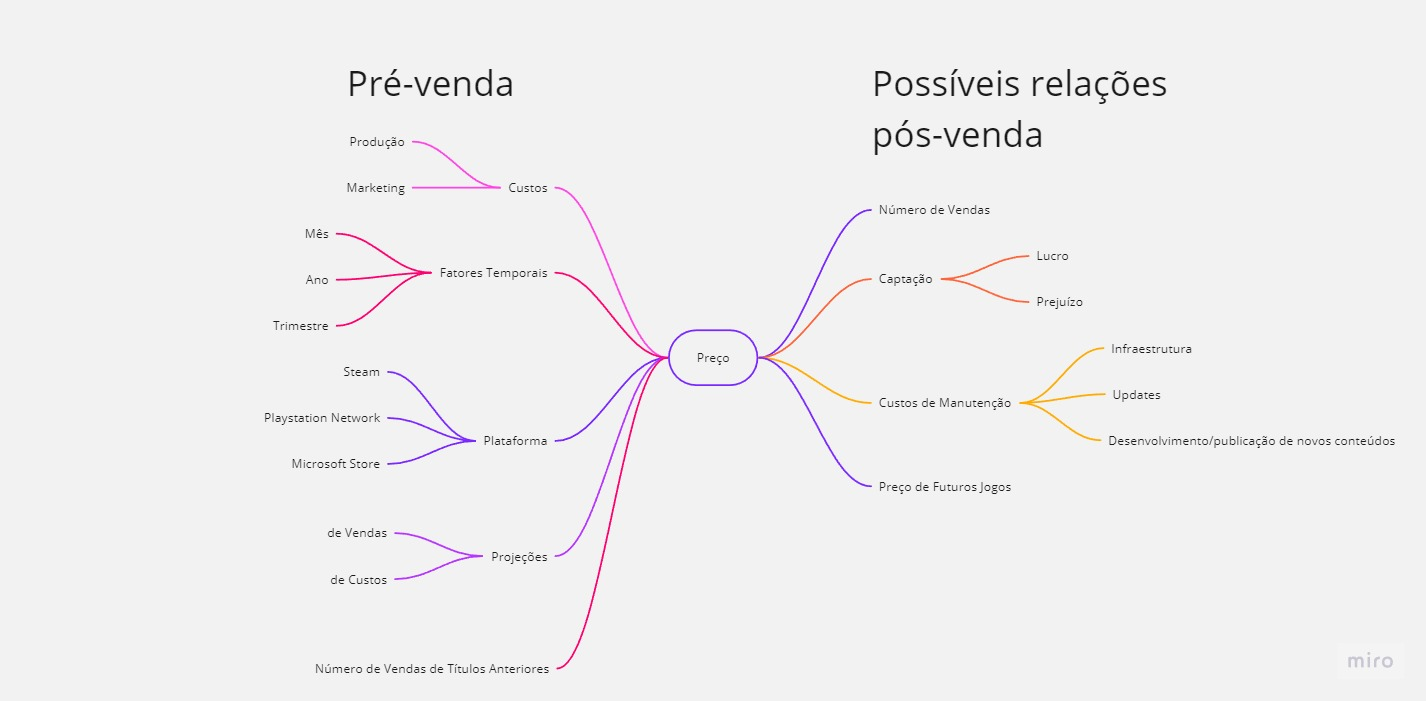

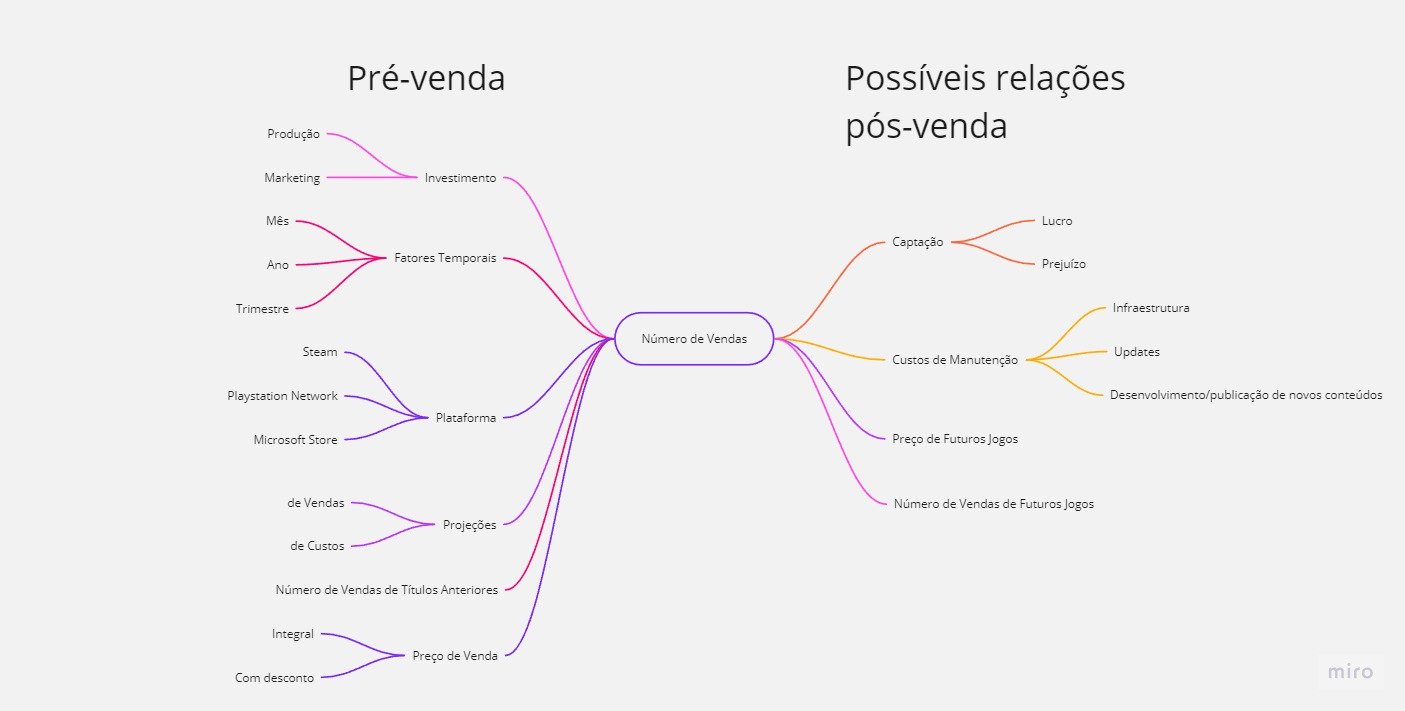

## 2.2 Creating Hypothesis

### 2.2.1 For Pricing

#### 2.2.1.1 Costs Related

- quanto maior o custo de produção, maior o preço do jogo
- quanto maior o custo de marketing, menor o preço do jogo

#### 2.2.1.2 Time Related

- o preço dos jogos aumenta conforme os anos passam
- jogos lançados no Q4 têm maior preço

#### 2.2.1.3 Plataform Related

- os preços de venda são mais baratos se publicados na Steam, em comparação com as outras duas citadas

#### 2.2.1.4 Projection Related

- quanto maior o custo projetado do jogo, maior o preço
- quanto maior o número projetado de vendas, menor o preço

#### 2.2.1.5 Other Factors


- quanto mais cópias um determinado estúdio vendeu no passado, maior o preço de futuros jogos

#### 2.2.1.6 Post Sales

- quanto maior o preço, maior o número de vendas
- quanto maior o preço, maior o preço de futuros jogos
- quanto maior o preço, maior é a captação
- quanto maior o preço, maior o custo de manutenção

### 2.2.2 For Sales

#### 2.2.2.1 Costs Related

- quanto maior o custo de produção, maior o número de vendas
- quanto maior o custo de marketing, maior o número de vendas

#### 2.2.2.2 Time Related

- o número de cópias vendidas aumenta a cada ano
- jogos lançados no Q4 têm maior número de vendas

#### 2.2.2.3 Plataform Related

- Steam é a plataforma que mais vende jogos de RPG

#### 2.2.2.4 Projection Related

- quanto maior o custo projetado do jogo, maior o número de vendas
- quanto maior o número projetado de vendas, maior o número de vendas

#### 2.2.2.5 Price Related

- quanto maior o preço integral, maior o número de vendas
- quanto maior o desconto, maior o número de vendas

#### 2.2.2.6 Other Factors

- quanto mais cópias um determinado estúdio vendeu no passado, maior o número de vendas de jogos futuros

#### 2.2.2.7 Post Sale

- quanto maior o número de vendas, maior o preço de jogos futuros
- quanto maior o número de vendas, maior o número de vendas de jogos futuros
- quanto maior o número de vendas, maior é a captação
- quanto maior o número de vendas, maior o custo de manutenção

## 2.3 Final Hypothesis List

Listaremos aqui as hipóteses que imaginamos serem verificáveis com o _dataset_ atual.

Para preço:

- o preço dos jogos aumenta conforme os anos passam;
- jogos lançados no Q4 têm maior preço;
- quanto mais cópias um determinado estúdio vendeu no passado, maior o preço de futuros jogos;
- quanto maior o preço, maior o número de vendas.

Para vendas:

- o número de cópias vendidas aumenta a cada ano;
- jogos lançados no Q4 têm maior número de vendas;
- quanto maior o preço integral, maior o número de vendas;
- quanto mais cópias um determinado estúdio vendeu no passado, maior o número de vendas de jogos futuros.

Relações pós-venda:

- quanto maior o número de vendas, maior o preço e número de vendas de jogos futuros;
- quanto maior o preço, maior o número de vendas;
- quanto maior o preço, maior o preço de jogos futuros.

## 2.4 Data Questioning

Listaremos aqui algumas perguntas a serem feitas para os dados, a fim de obter _insights_ sobre tendências e padrões.

- qual a evolução do preço de jogos ao longo dos anos?
- e do número de cópias vendidas?
- definindo como 'bons vendedores' os jogos que venderam mais cópias que a média observada, qual é a média de preço dentre eles?
- e dos jogos que perfomaram mal?
- qual é a média de cópias vendidas pelos bons vendedores?
- e dos que perfomaram mal?
- qual ano vendeu mais cópias? este número está relacionado com o número de lançamentos?
- qual ano movimentou mais dinheiro?
- qual jogo vendeu o maior número de cópias? este jogo segue uma tendência do seu ano de lançamento, ou é um caso especial?
- qual jogo teve maior faturamente por jogo? qual o peso das variáveis 'cópias vendidas' e 'preço' para o faturamente?

## 2.5 Feature Engineering - Part I

Para verificação das hipóteses, criaremos os seguintes _features_

- quarter: dividiremos o ano nos trimestres Q1, Q2, Q3 e Q4, representados no dataframe só pelo seu respectivo algarismo
- sales_perfomance: classificaremos os jogos com 0 ou 1, sendo 0 se o jogo vendeu menos cópias que a média, e 1 se vendeu mais
- recurrent_developers: classificaremos os desenvolvedores com 0 ou 1, sendo 0 se só produziu um único jogo, e 1 se produziu mais

Além disso, colocaremos a data no formato de _time series_.

In [13]:
# Criando as colunas para cada variável

quarters = pd.Series(np.zeros(10477), name='quarter')
sales_perfomance = pd.Series(np.zeros(10477), name='sales_perfomance')
recurrent_developers = pd.Series(np.zeros(10477), name='recurrent_developers')
release_date = pd.Series(np.zeros(10477), name='release_date')

rpg_games_data2 = rpg_games_data2.join([quarters, sales_perfomance, recurrent_developers, release_date])

In [14]:
# Setando a variável 'quarter'

rpg_games_data2['quarter'] = rpg_games_data2['release_month'].apply(lambda x: ((x -1)// 3)+1)

In [15]:
# Setando a variável 'sales_performance'

average_sales_mean = 169578.600744
rpg_games_data2['sales_perfomance'] = rpg_games_data2['average_estimated_owners_number'].apply(lambda x: 1 if (x>average_sales_mean) else 0)

In [16]:
# Setando a variável 'recurrent_developers'

indexes_array = check_uniqueness(rpg_games_data2['developer'])
rpg_games_data2.loc[indexes_array,'recurrent_developers'] = 1

In [17]:
# Colocando em formato padrão de data

rpg_games_data2['release_date'] = rpg_games_data2.apply(lambda row: str(row.release_year) + '-' + str(row.release_month) + '-01' if (row.release_month>9) else str(row.release_year) + '-0' + str(row.release_month) + '-01' , axis=1) 

In [18]:
rpg_games_data2

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher,quarter,sales_perfomance,recurrent_developers,release_date
0,1,Disco Elysium - The Final Cut,10,2019,39.99,1000000.0,2000000.0,1500000.0,ZA/UM,ZA/UM,4,1,0.0,2019-10-01
1,2,BioShock,8,2007,4.99,1000000.0,2000000.0,1500000.0,"2K Boston, 2K Australia",2K,3,1,0.0,2007-08-01
2,3,Mass Effect 2 (2010),1,2010,19.99,1000000.0,2000000.0,1500000.0,BioWare,Electronic Arts,1,1,1.0,2010-01-01
3,4,Mass Effect 2 Digital Deluxe Edition,1,2010,29.99,1000000.0,2000000.0,1500000.0,BioWare,Electronic Arts,1,1,1.0,2010-01-01
4,5,Divinity: Original Sin - Enhanced Edition,10,2015,39.99,1000000.0,2000000.0,1500000.0,Larian Studios,Larian Studios,4,1,1.0,2015-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10472,10473,Sunrider: Liberation Day - Captain's Edition,3,2016,24.99,100000.0,200000.0,150000.0,Love in Space,Sekai Project,1,0,1.0,2016-03-01
10473,10474,Niplheim's Hunter - Branded Azel,1,2019,11.99,20000.0,50000.0,35000.0,Black Train,Kagura Games,1,0,1.0,2019-01-01
10474,10475,PAGUI打鬼,10,2019,19.99,20000.0,20000.0,20000.0,padendon,padendon,4,0,0.0,2019-10-01
10475,10476,蓝宝石般的被害妄想少女/Damsel with persecutory delusion,11,2018,4.99,20000.0,50000.0,35000.0,橙光游戏,橙光游戏,4,0,1.0,2018-11-01


# 3.0 Variable Filtering

In [19]:
rpg_games_data3 = rpg_games_data2.copy()
rpg_games_data3.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data3.csv')

## 3.1 Line Filtering

## 3.2 Column Selection

Excluíremos as colunas de que não precisaremos nas próximas etapas, a saber:

- game_title
- release_month
- release_year
- lowest_estimated_owners_number
- highest_estimated_owners_number
- publisher

In [20]:
rpg_games_data3.drop(['game_title', 'release_month', 'release_year', 'lowest_estimated_owners_number', 'highest_estimated_owners_number', 'publisher'], axis=1, inplace=True)

In [21]:
rpg_games_data3

,steam_id_number,release_price,average_estimated_owners_number,developer,quarter,sales_perfomance,recurrent_developers,release_date
0,1,39.99,1500000.0,ZA/UM,4,1,0.0,2019-10-01
1,2,4.99,1500000.0,"2K Boston, 2K Australia",3,1,0.0,2007-08-01
2,3,19.99,1500000.0,BioWare,1,1,1.0,2010-01-01
3,4,29.99,1500000.0,BioWare,1,1,1.0,2010-01-01
4,5,39.99,1500000.0,Larian Studios,4,1,1.0,2015-10-01
...,...,...,...,...,...,...,...,...
10472,10473,24.99,150000.0,Love in Space,1,0,1.0,2016-03-01
10473,10474,11.99,35000.0,Black Train,1,0,1.0,2019-01-01
10474,10475,19.99,20000.0,padendon,4,0,0.0,2019-10-01
10475,10476,4.99,35000.0,橙光游戏,4,0,1.0,2018-11-01


## 20 EXPLORATORY STATISTICS

In [22]:
# CÉLULA DE TESTES

d19 = rpg_games_data1.loc[release_year == 2019]
d19 = d19['release_price']

d19_axis = plt.hist(d19, 50) # retorna um array com o número de ocorrências por intervalo, e outro com os valores de fronteiras dos intervalos

d19_counts = d19_axis[0] # número de ocorrências por intervalo
d19_bins = d19_axis[1] # valores de fronteira dos intervalos

NameError: name 'release_year' is not defined

In [ ]:
# CÉLULA DE TESTES
print(len(d19_counts))
print(len(d19_bins))


### 1.9.1 Numerical Attributes per Year

Calcularemos as seguintes métricas estatísticas separadas por ano:

- média

(mais serão inclusas, conforme fizer sentido)

Avaliaremos suas respectivas evoluções ao longo do tempo, para as seguinte variáveis numéricas:

- release_price
- lowest_estimated_owners_number
- highest_estimated_owners_number
- average_estimated_owners_number

In [ ]:
# criando um array do intervalo de anos. será usado para avaliar as métricas por ano, e plotar os gráficos
year_loop_array = np.arange(release_year_min, release_year_max+1)

In [ ]:
# média de preço no lançamento por ano

mean_prince_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, release_price)

In [ ]:
# menor número estimado de compradores por ano

lowest_estimated_owners_number_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, lowest_estimated_owners_number)

In [ ]:
# maior número estimado de compradores por ano

highest_estimated_owners_number_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, highest_estimated_owners_number)

In [ ]:
# número médio estimado de compradores por ano

average_estimated_owners_number_per_year = data_assembly_per_year(rpg_games_data1, year_loop_array, release_year, average_estimated_owners_number)

### 1.9.2 Data per Year Visualization

Plotaremos os gráficos das seguintes variáveis contra os anos, calculadas na secão anterior:

- release_price_per_year
- lowest_estimated_owners_number_per_year
- highest_estimated_owners_number_per_year
- average_estimated_owners_number_per_year





In [ ]:
# média de preço no lançamento por ano
plt.plot(year_loop_array, mean_prince_per_year)

In [ ]:
# menor número estimado de compradores por ano
plt.plot(year_loop_array, lowest_estimated_owners_number_per_year)

In [ ]:
# maior número estimado de compradores por ano
plt.plot(year_loop_array, highest_estimated_owners_number_per_year)

In [ ]:
# número médio estimado de compradores por ano
plt.plot(year_loop_array, average_estimated_owners_number_per_year)

In [ ]:
# paramos por aqui

In [ ]:
compradores_estimados = rpg_games_data['average_estimated_owners_number'] 
ano_lancamento = rpg_games_data['release_year']
a = compradores_estimados.sort_values(key=lambda col: col.str.replace(',', '').astype('float64')) # substituindo as strings por floats, e ordenando

In [ ]:
b = list(map(lambda str: str.replace(',', ''), a)) # criando um array b usando uma transformação sobre a
b = np.asarray(b, dtype=float) # transformando b em um vetor do numpy de floats
media = np.mean(b)
media

In [ ]:
c = np.asarray(ano_lancamento, dtype=int)
plt.hist(c, bins=40) # plotando o número de jogos lançados no ano 

In [ ]:
d19 = tabela.loc[rpg_games_data['release_year'] == 2019] # nessa célula, vamos começar a investigar qual ano vendeu o maior montante de cópias de jogos, e calcular a relação cópia/jogo por ano
d20 = tabela.loc[rpg_games_data['release_year'] == 2020]
d21 = tabela.loc[rpg_games_data['release_year'] == 2021]

copias_d19_str = d19['average_estimated_owners_number']
copias_d20_str = d20['average_estimated_owners_number']
copias_d21_str = d21['average_estimated_owners_number']

copias_d19 = list(map(lambda str: str.replace(',', ''), copias_d19_str))
copias_d19 = np.asarray(copias_d19, dtype=float)

copias_d20 = list(map(lambda str: str.replace(',', ''), copias_d20_str))
copias_d20 = np.asarray(copias_d20, dtype=float)

copias_d21 = list(map(lambda str: str.replace(',', ''), copias_d21_str))
copias_d21 = np.asarray(copias_d21, dtype=float)

total_copias_d19 = np.sum(copias_d19)
total_copias_d20 = np.sum(copias_d20)
total_copias_d21 = np.sum(copias_d21)

In [ ]:
print(total_copias_d19)
print(total_copias_d20)
print(total_copias_d21)

print(copias_d19.size)
print(copias_d20.size)
print(copias_d21.size)

print(np.mean(copias_d19)) # equivalente a total_copias_d19/copias_d19.size
print(np.mean(copias_d20))
print(np.mean(copias_d21))

# ideia: obter essa média de cópias vendidas por ano para todo o conjunto de amostras, e plotar o gráfico. observar se acompanha a distribuição de número de jogos lançados por ano

In [ ]:
precos_d19 = d19['release_price'] # análise da média de preço por ano
precos_d19 = np.asarray(precos_d19)

precos_d20 = d20['release_price']
precos_d20 = np.asarray(precos_d20)

precos_d21= d21['release_price']
precos_d21 = np.asarray(precos_d21)

print(np.mean(precos_d19))
print(np.mean(precos_d20))
print(np.mean(precos_d21))

In [ ]:
big_seller_d19 = np.where(copias_d19>100000) # análise sobre a média de preço para jogos que venderam mais de 100k cópias
big_seller_d20 = np.where(copias_d20>100000)
big_seller_d21 = np.where(copias_d21>100000)

print(np.mean(precos_d19[big_seller_d19]))
print(np.mean(precos_d20[big_seller_d20]))
print(np.mean(precos_d21[big_seller_d21]))

In [ ]:
release_year_tab = rpg_games_data1['release_year']

oldest_date = np.min(release_year_tab)
earliest_date = np.max(release_year_tab)

year_array = np.arange(oldest_date, earliest_date+1)

year_data_array = []
for year in year_array:
    year_data = rpg_games_data1.loc[rpg_games_data1['release_year'] == year]
    year_data_array.append(year_data)
    
mean_prices_year = []
for year_data in year_data_array:
    prices_d = year_data['release_price']
    prices_d = np.asarray(prices_d)
    mean_price = np.mean(prices_d)
    mean_prices_year.append(mean_price)
    
mean_prices_year = np.asarray(mean_prices_year)    
    
mean_prices_year[np.isnan(mean_prices_year)] = 0   

In [ ]:
plt.plot(year_array, mean_prices_year)